<a href="https://colab.research.google.com/github/imams12/Rockpaperscissors-Prediction/blob/main/Rockpaperscissor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nama   : Imam Suyuti
*   Alamat : Desa Sonorejo Rt.02 Rw.01 Kec. Jakenan Kab. Pati
*   Email  : imamsuyuti00@gmail.com 


# Rock Paper Scissor Prediction


## Import Package

In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Import Data

In [2]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-09 12:57:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.40MB/s    in 5m 5s   

2021-06-09 13:02:36 (1.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Pre-Processing Data

In [3]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
import os, shutil
base_dir = '/tmp/rockpaperscissors'
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'paper', 'rock']

In [7]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')

In [8]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'train', 'paper', 'val', 'rock']

In [10]:
# Membuat direktori train dan validation
train_scissors = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
validation_scissors = os.path.join(validation_dir, 'scissors')
validation_paper = os.path.join(validation_dir, 'paper')
validation_rock = os.path.join(validation_dir, 'rock')

In [11]:
os.mkdir(train_scissors)
os.mkdir(train_paper)
os.mkdir(train_rock)
os.mkdir(validation_scissors)
os.mkdir(validation_paper)
os.mkdir(validation_rock)

In [12]:
from sklearn.model_selection import train_test_split
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

In [13]:
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(validation_scissors, file))
for file in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(validation_paper, file))
for file in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(validation_rock, file))

In [14]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size = (150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32,
        class_mode = 'sparse')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32, 
        class_mode = 'sparse')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Model Training

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [55]:
# compile model dengan 'adam' optimizer loss function 'sparse_categorical_crossentropy' 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [56]:
checkpoint_path = "training_1/cp2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

callbacks = [checkpoint, earlystop]

In [58]:
model_history = model.fit_generator(train_generator, validation_data=validation_generator,
                                    epochs=20,
                                    steps_per_epoch=25,
                                    validation_steps=5,
                                    callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
25/25 [==============================] - 43s 2s/step - loss: 1.0463 - accuracy: 0.4938 - val_loss: 1.0273 - val_accuracy: 0.3875

Epoch 00001: val_loss improved from inf to 1.02733, saving model to training_1/cp2.ckpt
INFO:tensorflow:Assets written to: training_1/cp2.ckpt/assets
Epoch 2/20
25/25 [==============================] - 43s 2s/step - loss: 0.6544 - accuracy: 0.7475 - val_loss: 0.5797 - val_accuracy: 0.7500

Epoch 00002: val_loss improved from 1.02733 to 0.57973, saving model to training_1/cp2.ckpt
INFO:tensorflow:Assets written to: training_1/cp2.ckpt/assets
Epoch 3/20
25/25 [==============================] - 43s 2s/step - loss: 0.3547 - accuracy: 0.8700 - val_loss: 0.2412 - val_accuracy: 0.9000

Epoch 00003: val_loss improved from 0.57973 to 0.24118, saving model to training_1/cp2.ckpt
INFO:tensorflow:Assets written to: training_1/cp2.ckpt/assets
Epoch 4/20
25/25 [==============================] - 43s 2s/step - loss: 0.2763 - accuracy: 0.9013 - val_loss: 0.2568 - 

## Accuracy Rate

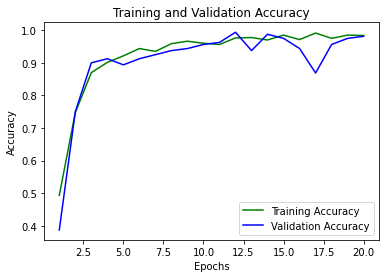

In [59]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,21)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Rate

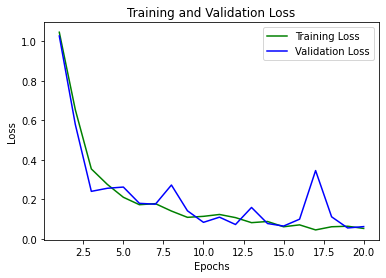

In [60]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,21)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Making the Prediction on a Single Image

Saving test5-removebg-preview.png to test5-removebg-preview (2).png
test5-removebg-preview.png
scissors


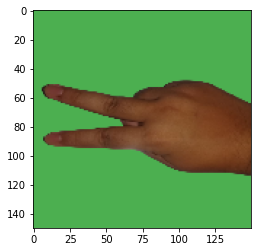

In [95]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_classes = np.argmax(classes)
  
  print(fn)
  if output_classes==0:
    print('paper')
  elif output_classes==1:
    print('rock')
  else :
    print('scissors')